In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

from sklearn.model_selection import train_test_split
X = df_wine.iloc[:,1:].values
Y = df_wine.iloc[:,0].values

x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state= 2, stratify= Y)

from sklearn.preprocessing import StandardScaler

SSC = StandardScaler()
x_train_std = SSC.fit_transform(x_train)
x_test_std = SSC.transform(x_test)


Eigen calculation:
Note:
The eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitude

You can find more information here: 
https://www.geeksforgeeks.org/engineering-mathematics/eigen-values/

In [2]:
import numpy as np
cov_mar = np.cov(x_test_std.T)
#Cov_mar is covelance matrix
eigen_val, eigen_vect = np.linalg.eig(cov_mar)

print(f"The eigen values is {eigen_val}")

# Using the linalg.eig function, we performed the eigendecomposition, which yielded a vector (eigen_vals) consisting of 13 eigenvalues and the corresponding eigenvectors stored as columns in a 13×13-dimensional matrix (eigen_vecs).


The eigen values is [4.69617259 2.43379112 1.3312977  1.20534756 1.08670023 0.82307954
 0.48817524 0.33663549 0.27511355 0.10189091 0.11482066 0.18272328
 0.16290498]


Total_explained Variance
 The variance explained ratio of an eigenvalue, , is simply the fraction of an eigenvalue, , and the total sum of the eigenvalues

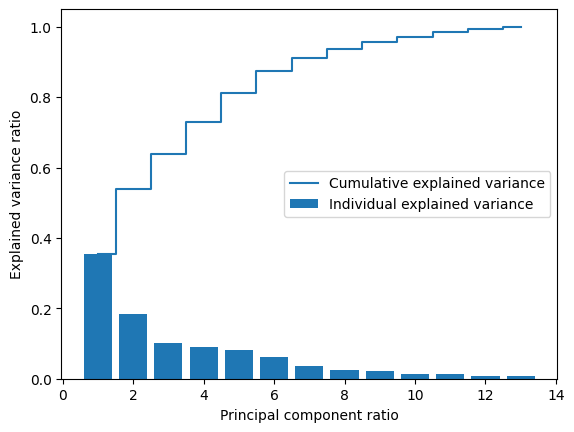

In [3]:
ror = sum(eigen_val)

var_exp = [(i/ror) for i in sorted(eigen_val, reverse = True)]
cum_VAR_EXP = np.cumsum(var_exp)
# cum_VAR_EXP IT CALCULATES THE CUMMULATIVE SUM

import matplotlib.pyplot as plt

plt.bar(range(1,14), var_exp, align = 'center', label = 'Individual explained variance' )
plt.step(range(1,14), cum_VAR_EXP, where = 'mid', label = 'Cumulative explained variance')

plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component ratio")
plt.legend(loc ='best')


# FEATURE TRANSFORMATION


In [5]:
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vect[:,i]) for i in range(len(eigen_val))]

eigen_pairs.sort(key = lambda k: k[0], reverse = True)

w= np.hstack((eigen_pairs[0][1][:,np.newaxis], eigen_pairs[1][1][:,np.newaxis]))

print(w)


[[ 0.08155853  0.47707632]
 [-0.36426147  0.16845319]
 [-0.04194977  0.32375653]
 [-0.21100161  0.05263811]
 [ 0.100618    0.11932733]
 [ 0.33877656  0.17184788]
 [ 0.43056285  0.1415314 ]
 [-0.23053353 -0.03864056]
 [ 0.29951788  0.02495344]
 [-0.18249799  0.55577812]
 [ 0.35530674 -0.24630472]
 [ 0.37465381 -0.05755492]
 [ 0.24765273  0.44457522]]


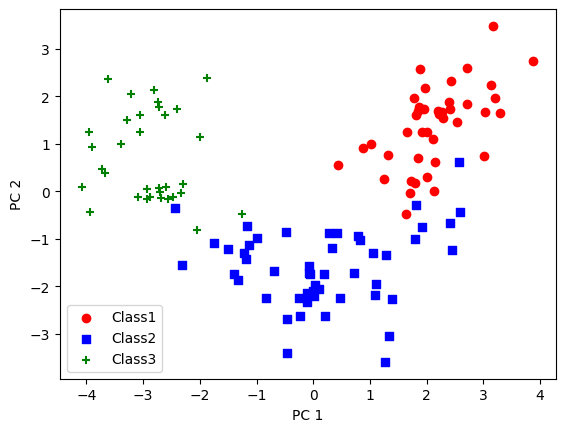

In [11]:
x_train_pca = x_train_std.dot(w)
color = ("r","b","g")
markers = ("o","s","+")

for l,c,m in zip(np.unique(y_train), color, markers):
    plt.scatter(x_train_pca[y_train==l,0], x_train_pca[y_train==l,1], c = c, label = f"Class{l}", marker= m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'best')


# Principal component analysis in scikit-learn